In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

font = {'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
create_time = pd.read_csv("../results_03_15/CKQST_KNN_NO_L9_search_sub_timeline_2500000_100000.csv", names=['obj_search', 'insert', 'ar']).reset_index()
create_time['name'] = 'ckqst'
create_time['obj_search'] = create_time['obj_search'] / 1000000
create_time['insert'] = create_time['insert'] / 1000000
create_time = create_time.melt(id_vars=['index', 'name', 'ar'], var_name='stage', value_name='time')

create_time

,index,name,ar,stage,time
0,0,ckqst,2.646341,obj_search,9.982999
1,1,ckqst,17.806978,obj_search,9.233918
2,2,ckqst,113.705647,obj_search,0.208717
3,3,ckqst,9.208080,obj_search,0.137462
4,4,ckqst,1.264358,obj_search,0.394922
...,...,...,...,...,...
4999995,2499995,ckqst,0.243780,insert,0.001656
4999996,2499996,ckqst,3.895217,insert,0.003734
4999997,2499997,ckqst,8.129695,insert,0.007892
4999998,2499998,ckqst,70.579975,insert,0.004468


## Creation time

(0.0, 10.0)

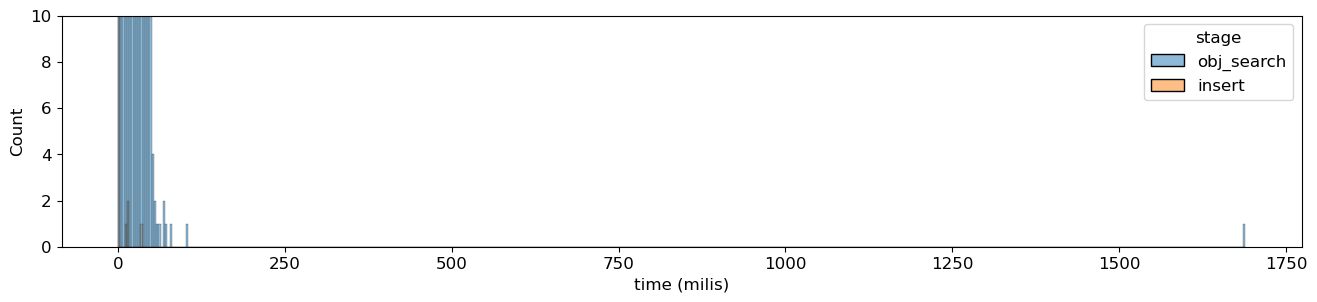

In [3]:
plt.figure(figsize=(16,3))
sns.histplot(x='time', bins=500, hue='stage', multiple='layer', data=create_time)
plt.xlabel('time (milis)')
plt.ylim(0, 10)

**Miserable queries**

Queries that takes too much time (>100 milis). 

In [4]:
miserable_queries = create_time[create_time['time'] > 50].sort_values('time', ascending=False)
miserable_queries

,index,name,ar,stage,time
2260183,2260183,ckqst,3.508987e+00,obj_search,1688.596812
2266844,2266844,ckqst,1.797693e+308,obj_search,104.135070
1722981,1722981,ckqst,1.797693e+308,obj_search,80.076428
1013140,1013140,ckqst,1.609610e+00,obj_search,72.402070
2006840,2006840,ckqst,1.797693e+308,obj_search,69.837758
1285558,1285558,ckqst,1.797693e+308,obj_search,69.288227
1727831,1727831,ckqst,1.797693e+308,obj_search,63.639893
795801,795801,ckqst,1.797693e+308,obj_search,60.725281
2248802,2248802,ckqst,1.797693e+308,obj_search,57.252140
2161408,2161408,ckqst,2.069347e+02,obj_search,56.333425


In [5]:
# step = 500000
# for i in range(0, 2500000, step):
# plt.figure(figsize=(16,3))
# sns.lineplot(x='index', y='time', hue='stage', style='stage', data=create_time)
# plt.xlabel('timestamp')
# plt.ylabel('time (milis)')

Relative time (FAST vs CkQST)

In [6]:
# relative_create = create_time[create_time['stage'] == 'insert']['time'].reset_index() - create_time[create_time['stage'] == 'obj_search']['time'].reset_index()
# relative_create
# plt.figure(figsize=(16,8))
# sns.lineplot(data=relative_create)
# plt.xlabel('timestamp')
# plt.ylabel('time (milis)')

## Load Queries

In [7]:
queries_df = pd.read_json('../../data/exported/places_o200000_q2500000_scaled.json', lines=True);
queries_df = queries_df.iloc[200000:, :].reset_index(drop=True).drop(columns=['id']).reset_index()

queries_df.tail()

,index,x,y,keywords,scaled
2499995,2499995,409.894898,103.097463,"[telephone, cellular]",True
2499996,2499996,402.284307,107.998284,[contractor],True
2499997,2499997,406.953882,110.040834,[church],True
2499998,2499998,412.621720,107.253521,"[lounge, drinking, eating, cocktail]",True
2499999,2499999,412.835319,107.262331,"[coping, plastering, tiling, pool, swimming]",True


### Properties of miserable queries

In [8]:
queries_df.shape

(2500000, 5)

In [9]:
details = queries_df.join(miserable_queries.set_index('index'), on='index').dropna().sort_values('time', ascending=False)
# details = details[details['name'] == 'fast']
details['ar'] = details['ar'].apply(lambda x: np.inf if x > 512 else x)
all = details.drop(columns=['x', 'y']).rename(columns={'time': 'insertion time (milis)'})

In [10]:
obj_search = all[all['stage'] == 'obj_search']
insert = all[all['stage'] == 'insert']

insert#.join(ckqsts, rsuffix='_')
obj_search.head(25)

,index,keywords,scaled,name,ar,stage,insertion time (milis)
2260183,2260183,[pump],True,ckqst,3.508987,obj_search,1688.596812
2266844,2266844,"[dry wall, contractor]",True,ckqst,inf,obj_search,104.135070
1722981,1722981,[establishment],True,ckqst,inf,obj_search,80.076428
1013140,1013140,"[loan, real estate]",True,ckqst,1.609610,obj_search,72.402070
2006840,2006840,[attorney],True,ckqst,inf,obj_search,69.837758
1285558,1285558,"[company, holding]",True,ckqst,inf,obj_search,69.288227
1727831,1727831,"[engineering, business]",True,ckqst,inf,obj_search,63.639893
795801,795801,"[leasing, video, disc, tape]",True,ckqst,inf,obj_search,60.725281
2248802,2248802,"[machine, shop]",True,ckqst,inf,obj_search,57.252140
2161408,2161408,[church],True,ckqst,206.934668,obj_search,56.333425


### Extract Inf

In [11]:
inf_queries = obj_search[obj_search['ar'] == np.inf]

In [12]:
inf_queries['index'].to_csv('../../data/exported/places_o200000_q2500000_scaled.inf.csv')